# Impossible Measurements

**Scott Prahl**

**Dec 2021**

With ideal measurements of total reflection and total transmission, there are unique values for the albedo and optical thickness.

Of course, in practice measurements are not perfect.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython as iad
%config InlineBackend.figure_format = 'retina'

def scattered_light(g=0, n=1, quad_pts=4):
    """Max scattered light for all optical thicknesses.""" 
    b = np.logspace(-5,5,200)
    r_white, t_white, _, _ = iad.Sample(a=1, b=b, g=g, n=n, quad_pts=quad_pts).rt()
    r_black, t_black, _, _ = iad.Sample(a=0, b=b, g=g, n=n, quad_pts=quad_pts).rt()

    xy = np.array([r_white-r_black, t_white-t_black]).T
    return xy

def unscattered_polygon(g=0, n=1, quad_pts=4):
    """Unscattered light for all optical thicknesses.""" 
    xy = scattered_light(g, n, quad_pts)
    xy = np.append(xy, np.array([[1,0]]), axis=0)
    xy = np.append(xy, np.array([[0,1]]), axis=0)
    xy = np.append(xy, np.array([[0,0]]), axis=0)
    
    return plt.Polygon(xy, facecolor='b', alpha=0.2)

def scattered_polygon(g=0,n=1,quad_pts=4):
    xy = scattered_light(g, n, quad_pts)
    xy = np.append(xy, np.array([[0,0]]), axis=0)

    return plt.Polygon(xy, facecolor='r', alpha=0.3)



## Index matched case

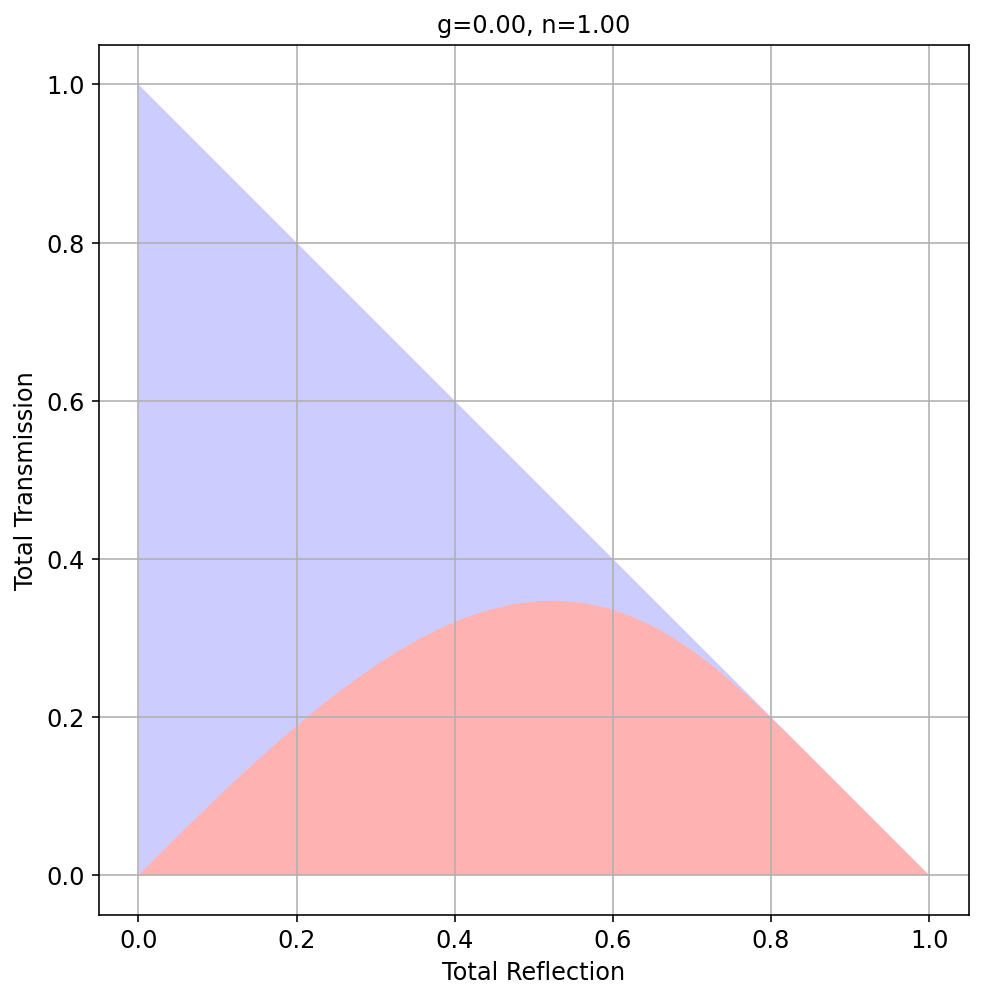

In [2]:
n=1.0
g=0.0


plt.figure(figsize=(8,8))


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.2f, n=%.2f" % (g,n))
plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

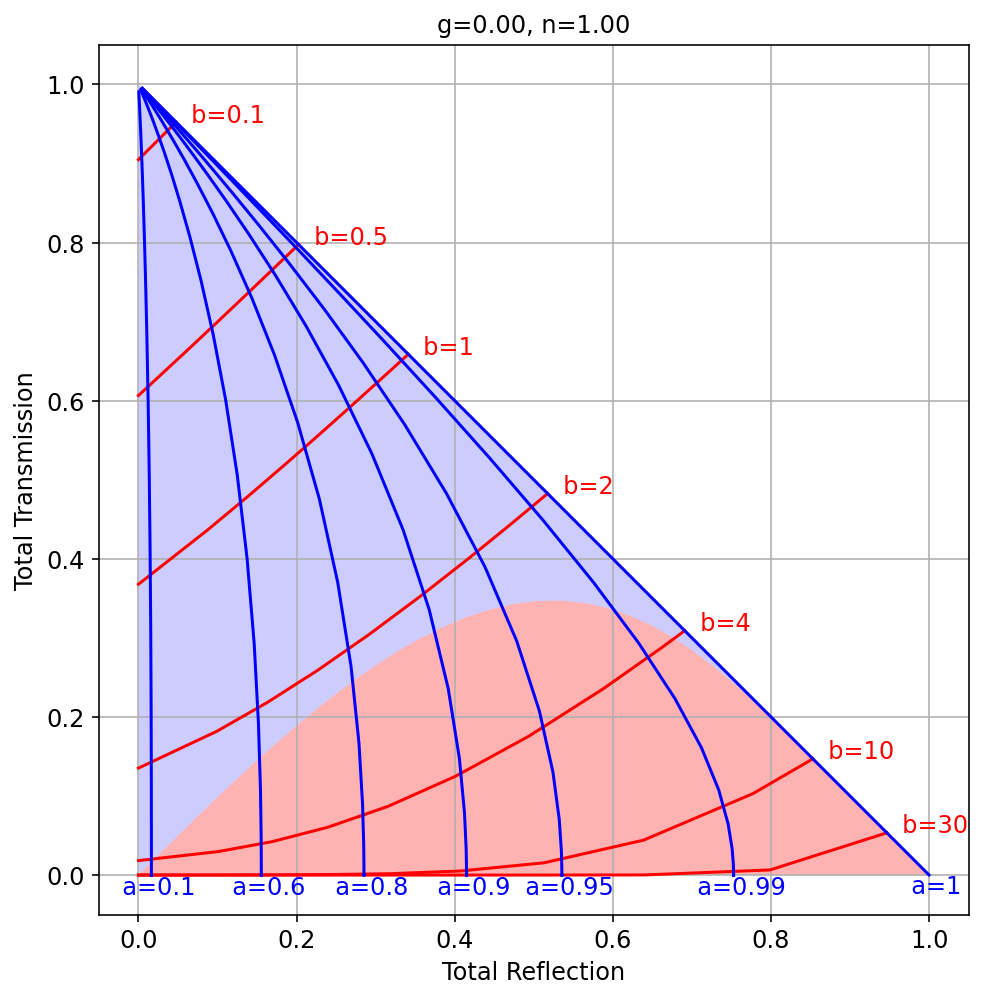

In [3]:
n=1.0
g=0.0


plt.figure(figsize=(8,8))

s = iad.Sample(g=g, n=n)
s.a = np.sqrt(1-np.linspace(1,0,10)**2)

for b in [ 0.1,  1, 0.5, 2, 4, 10, 30]:
    s.b = b
    UR1, UT1, _, _ = s.rt()

    plt.plot(UR1, UT1,'r', markersize=2)
    plt.text(UR1[-1], UT1[-1],"  b=%g"%s.b,fontsize=12,color='red')

s.b = np.logspace(-2,4,50)
for a in [0.1, 0.6, 0.8, 0.9, 0.95, 0.99,1]:
    s.a = a
    UR1, UT1, _, _ = s.rt()
    plt.plot(UR1, UT1,'b', markersize=2)
    plt.text(UR1[-1], UT1[-1],"  a=%g"%s.a,fontsize=12,ha='center',va='top',color='blue')


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.2f, n=%.2f" % (g,n))
plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

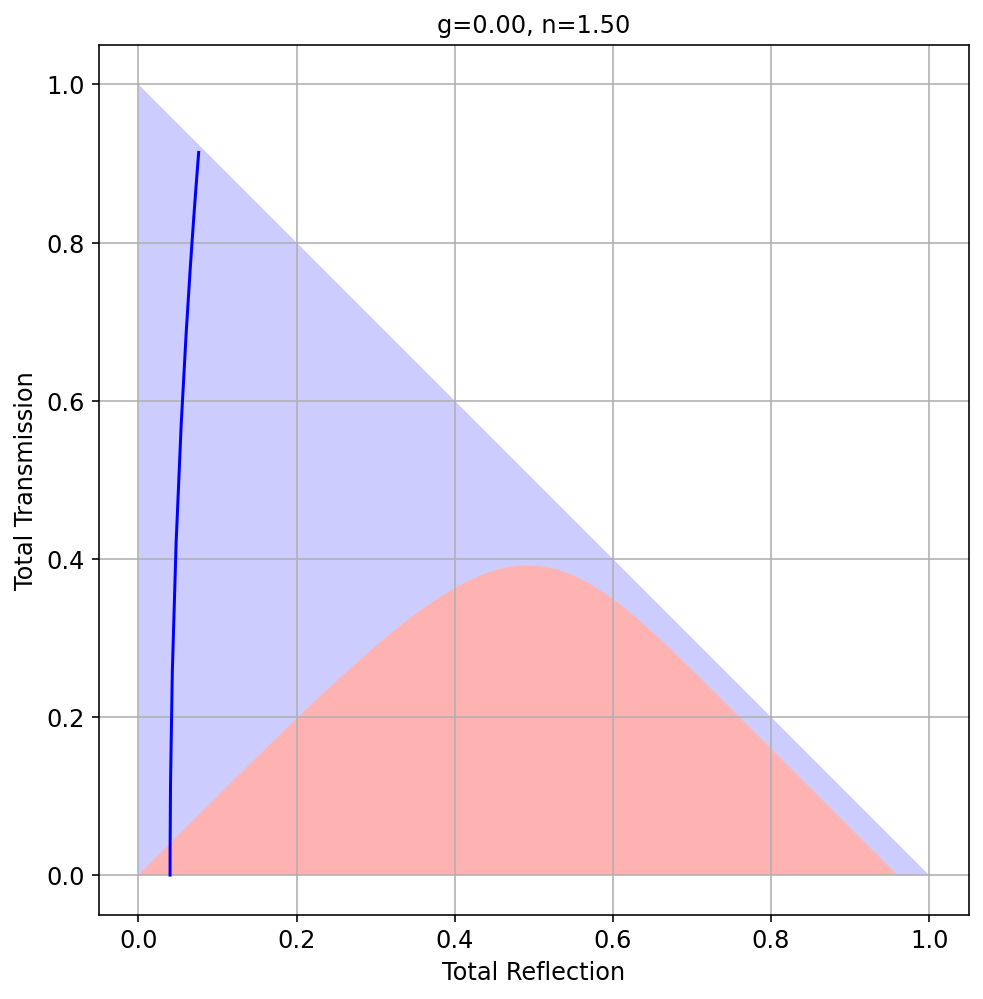

In [4]:
n=1.5
g=0.0


plt.figure(figsize=(8,8))

s = iad.Sample(g=g, n=n)

s.b = np.logspace(-2,2,20)
UR1 = np.zeros_like(s.b)
UT1 = np.zeros_like(s.b)
for i,b in enumerate(np.logspace(-2,2,20)):
    s.b = b
    UR1[i], UT1[i] = s.unscattered_rt()

plt.plot(UR1, UT1,'b', markersize=2)
#plt.text(UR1[-1], UT1[-1],"  a=%g"%a,fontsize=12,ha='center',va='top')


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.2f, n=%.2f" % (g,n))
plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

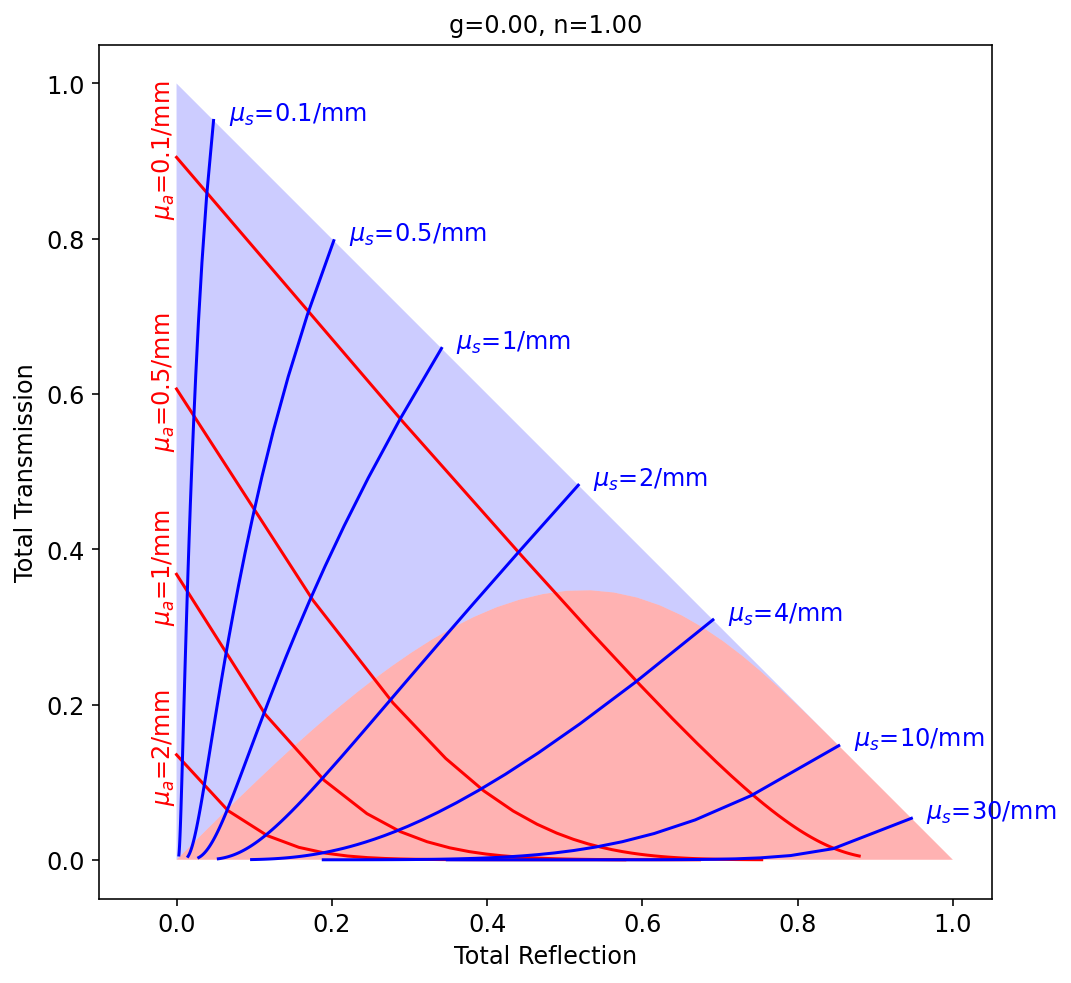

In [5]:
n=1.0
g=0.0
d = 1

plt.figure(figsize=(8,8))

s = iad.Sample(a=a, g=g, n=n)
mus = np.linspace(0,50)

for mua in [ 0.1,  1, 0.5, 2]:
    s.a = mus/(mus+mua)
    s.b = (mus+mua)*d
    UR1, UT1, _, _ = s.rt()

    plt.plot(UR1, UT1,'r', markersize=2)
    plt.text(UR1[0], UT1[0],"  $\mu_a$=%g/mm"%mua,fontsize=12,ha='right',va='center',rotation='vertical',color='red')


mua = np.linspace(0,5)

for mus in [ 0.1,  1, 0.5, 2, 4, 10, 30]:

    s.a = mus/(mus+mua)
    s.b = (mus+mua)*d

    UR1, UT1, _, _ = s.rt()
    plt.plot(UR1, UT1,'b', markersize=2)
    plt.text(UR1[0], UT1[0],"  $\mu_s$=%g/mm"%mus,fontsize=12, color='blue')


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.1,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.2f, n=%.2f" % (g,n))
plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.show()

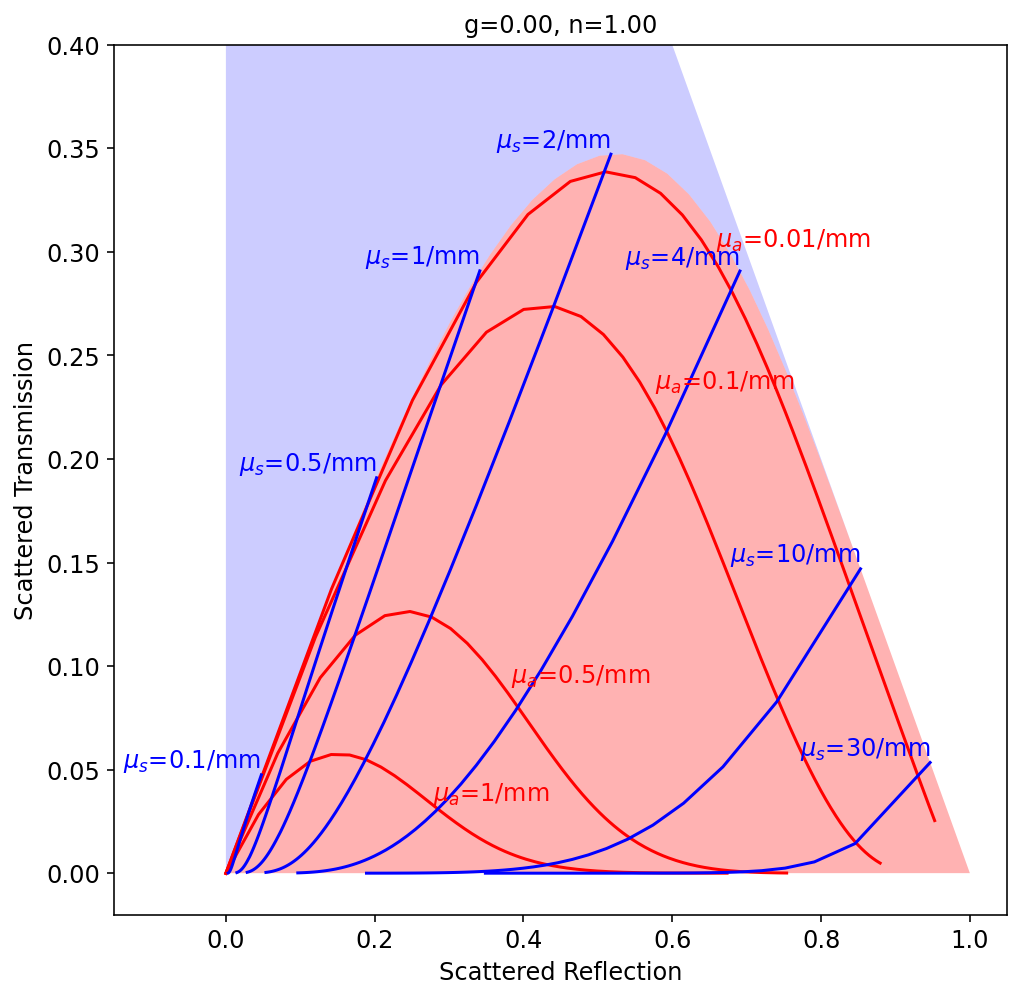

In [58]:
n=1.0
g=0.0
d = 1

plt.figure(figsize=(8,8))

s = iad.Sample(a=a, g=g, n=n)
mus = np.linspace(0,50,150)

for mua in [0.01, 0.1, 0.5, 1]:
    s.a = mus/(mus+mua)
    s.b = (mus+mua)*d
    UR1, UT1, _, _ = s.rt()
    rc,tc = s.unscattered_rt()
    UR1 -= rc
    UT1 -= tc

    plt.plot(UR1, UT1,'r', markersize=2)
    plt.text(UR1[10], UT1[10],"  $\mu_a$=%g/mm"%mua,fontsize=12,ha='left',va='center',color='red')


mua = np.linspace(0,5)

for mus in [ 0.1,  1, 0.5, 2, 4, 10, 30]:

    s.a = mus/(mus+mua)
    s.b = (mus+mua)*d

    UR1, UT1, _, _ = s.rt()
    rc,tc = s.unscattered_rt()
    UR1 -= rc
    UT1 -= tc
    plt.plot(UR1, UT1,'b', markersize=2)
    plt.text(UR1[0], UT1[0],"  $\mu_s$=%g/mm"%mus,fontsize=12, color='blue', ha='right', va='bottom')


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

#plt.gca().set_aspect(1)
plt.xlim(-0.15,1.05)
plt.ylim(-0.02 ,0.4)

plt.title("g=%.2f, n=%.2f" % (g,n))
plt.xlabel('Scattered Reflection',fontsize=12)
plt.ylabel('Scattered Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

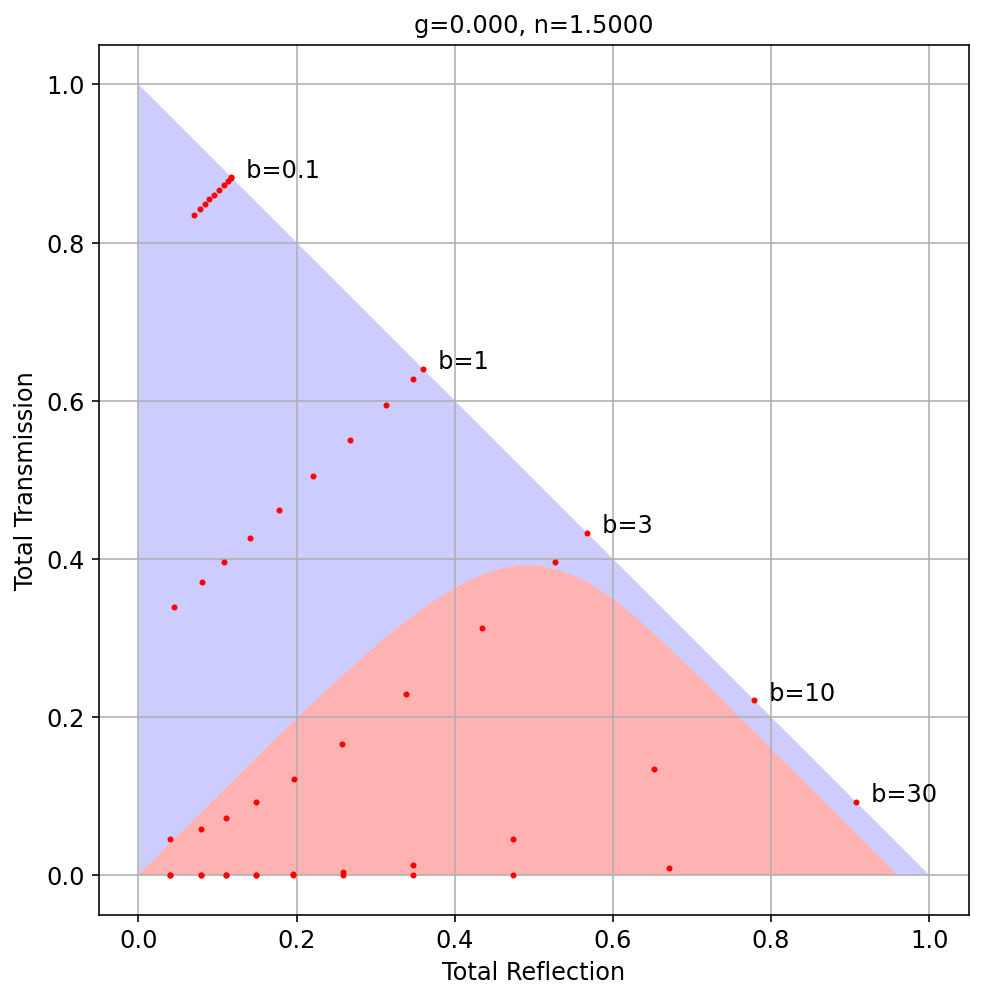

In [51]:
n=1.5
g=0.0

a = np.sqrt(1-np.linspace(1,0,10)**2)

plt.figure(figsize=(8,8))
for i,b in enumerate([ 0.1,  1, 3, 10, 30]):
    s = iad.Sample(a,b,n=n)
    UR1, UT1, _, _ = s.rt()

    plt.plot(UR1,UT1,'or', markersize=2)
    plt.text(UR1[-1],UT1[-1],"  b=%g"%b,fontsize=12)


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.3f, n=%.4f" % (g,n))

plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

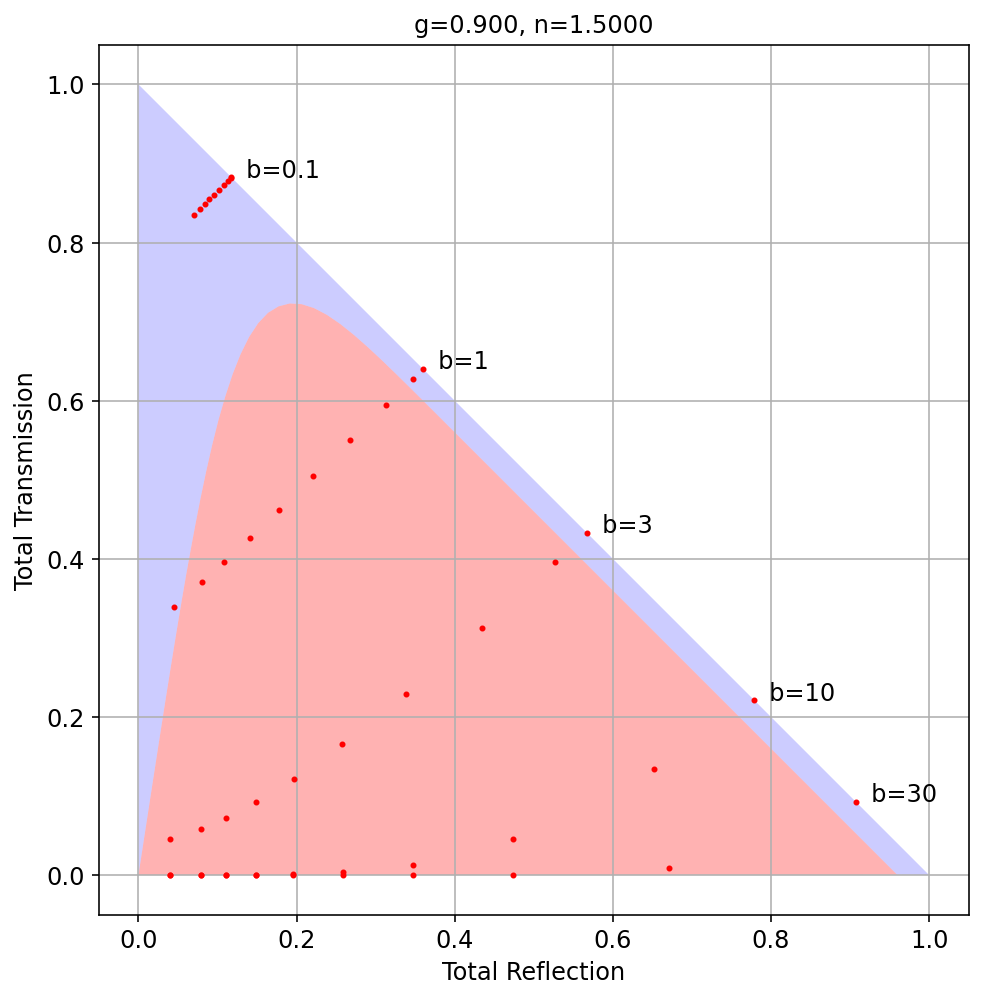

In [8]:
n=1.5
g=0.9

a = np.sqrt(1-np.linspace(1,0,10)**2)

plt.figure(figsize=(8,8))
for i,b in enumerate([ 0.1,  1, 3, 10, 30]):
    s = iad.Sample(a,b,n=n)
    UR1, UT1, _, _ = s.rt()

    plt.plot(UR1,UT1,'or', markersize=2)
    plt.text(UR1[-1],UT1[-1],"  b=%g"%b,fontsize=12)


plt.gca().add_patch(scattered_polygon(g,n))
plt.gca().add_patch(unscattered_polygon(g,n))

plt.gca().set_aspect(1)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.title("g=%.3f, n=%.4f" % (g,n))


plt.xlabel('Total Reflection',fontsize=12)
plt.ylabel('Total Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

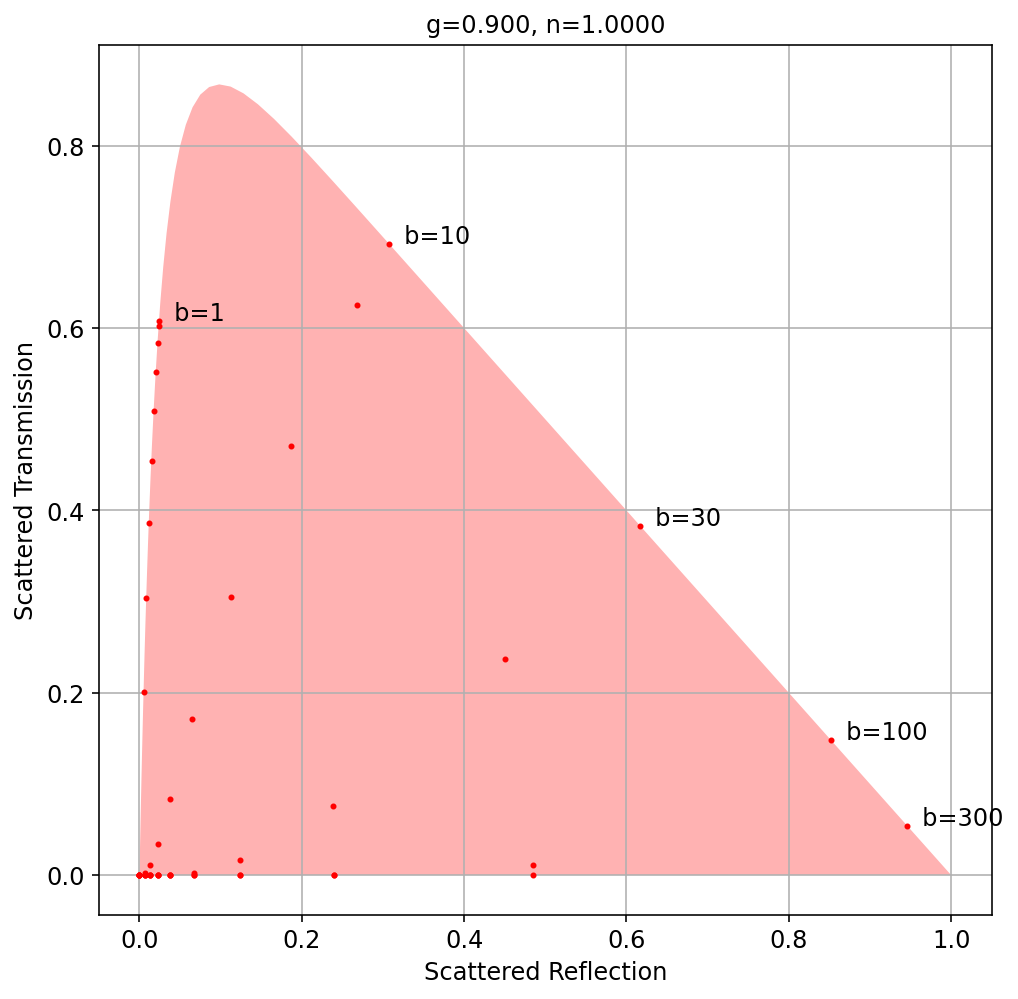

In [9]:
n=1.0
g=0.9

a = np.sqrt(1-np.linspace(1,0,10)**2)

plt.figure(figsize=(8,8))
bb = np.array([ 0.1,  1, 3, 10, 30])/(1-g)

for i,b in enumerate(bb):
    bprime = b*(1-g*a)
    aprime = a*(1-g)/(1-a*g)
    s = iad.Sample(a,b,n=n,g=g)
    UR1, UT1, _, _ = s.rt()
    UR1 -= UR1[0]
    UT1 -= UT1[0]
    plt.plot(UR1,UT1,'or', markersize=2)
    plt.text(UR1[-1],UT1[-1],"  b=%g"%b,fontsize=12)


plt.gca().add_patch(scattered_polygon(g,n))

plt.xlim(-0.05,1.05)
#plt.ylim(-0.05,1.05)
plt.title("g=%.3f, n=%.4f" % (g,n))


plt.xlabel('Scattered Reflection',fontsize=12)
plt.ylabel('Scattered Transmission',fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.yticks(fontsize=12)

plt.show()

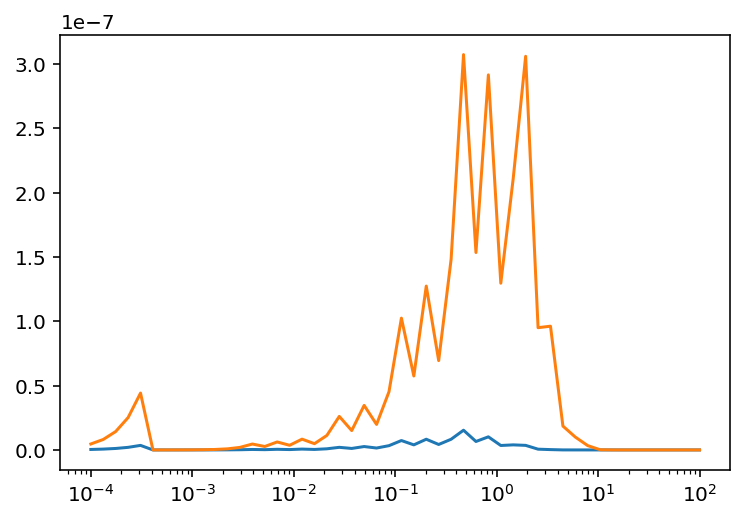

In [10]:
n=1.5
b_list=np.logspace(-4,2)
g=0.9
ru=np.zeros_like(b_list)
tu=np.zeros_like(b_list)
for i,b in enumerate(b_list):
    ru[i], tu[i] = iad.fresnel.specular_rt(1, n, 1, b, 1)

RU, TU, _, _ = iad.Sample(0,b_list,n=n,g=0.9,quad_pts=32).rt()

plt.semilogx(b_list,-RU+ru)
plt.semilogx(b_list,-TU+tu)
plt.show()

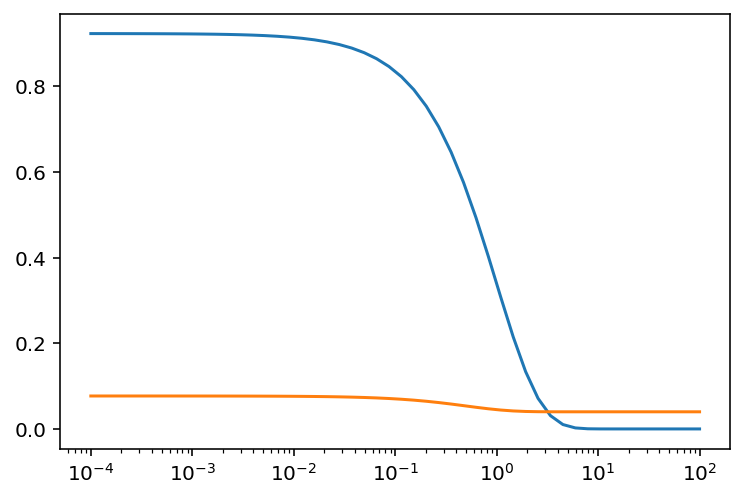

In [11]:
n=1.5
b_list=np.logspace(-4,2)
g=0.9
ru=np.zeros_like(b_list)
tu=np.zeros_like(b_list)
for i,b in enumerate(b_list):
    ru[i], tu[i] = iad.fresnel.absorbing_glass_RT(1.0, 1.5, 1.0, 1, b)

RU, TU, _, _ = iad.Sample(0,b_list,n=n,g=0.9,quad_pts=32).rt()

plt.semilogx(b_list,TU)
plt.semilogx(b_list,RU)
plt.show()

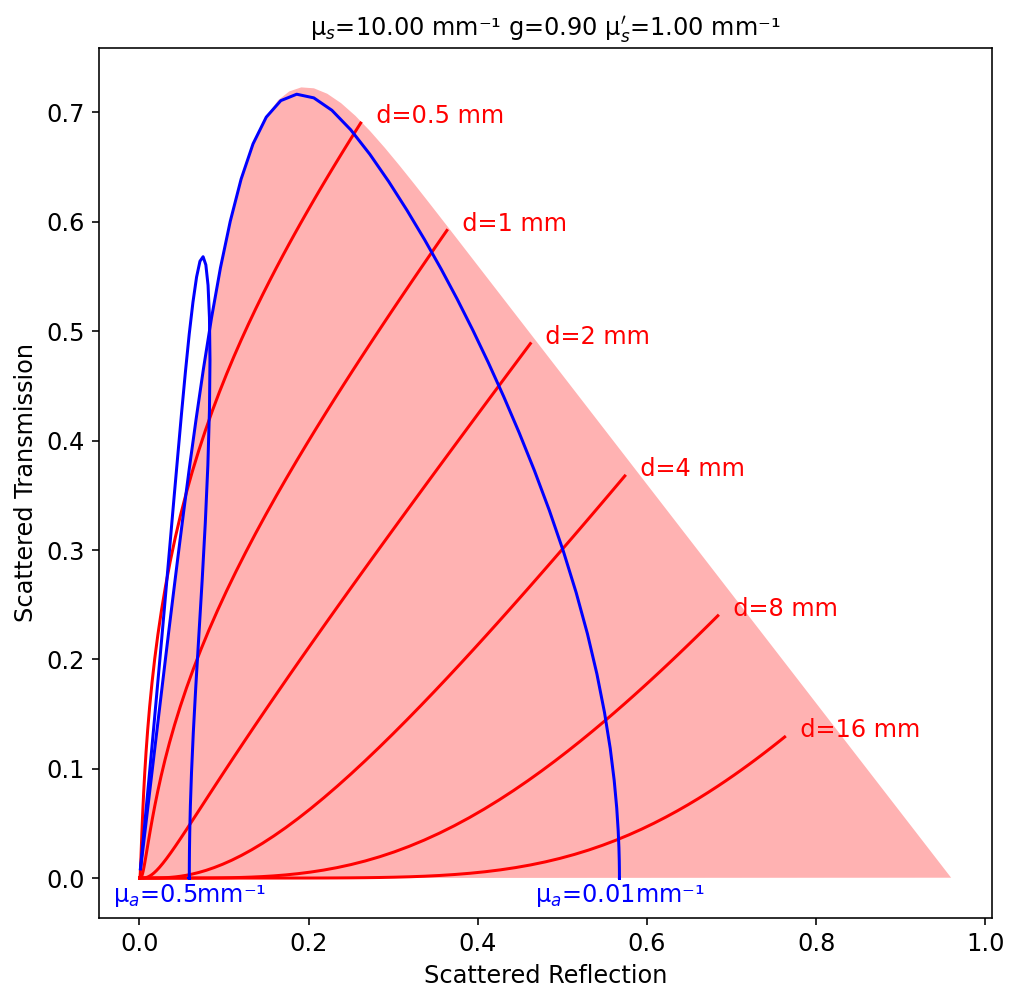

In [12]:
n=1.5
g=0.9
N=4
mu_s = 1/(1-g)
plt.figure(figsize=(8,8))

#draw lines of constant sample thickness
mu_a = np.logspace(-3,2,100)
dd = np.array([0.5, 1, 2, 4, 8, 16])

for i,d in enumerate(dd):
    a = mu_s/(mu_s+mu_a)
    b = (mu_s+mu_a)*d
    s = iad.Sample(a,b,n=n,g=g,quad_pts=N)
    UR1, UT1, _, _ = s.rt()
    
    s = iad.Sample(0,b,n=n,g=g,quad_pts=N)
    UR0, UT0, _, _ = s.rt()
    UR1 -= UR0
    UT1 -= UT0

    plt.plot(UR1,UT1,'r')

    for j in range(len(mu_a)):
        if False and UR1[j]<0.1:
            bprime = a[j]*b[j]*(1-g)+(1-a[j])*b[j]
            plt.text(UR1[j],UT1[j],"%.2f,%.2f"%(a[j],b[j]),color='blue')



    if d<=2*(1-g):
        plt.text(UR1[0],UT1[0],"  d=%g mm"%d,fontsize=12,ha='right',color='red')
    else:
        plt.text(UR1[0],UT1[0],"  d=%g mm"%d,fontsize=12,color='red')
    
# draw lines of constant mu_a
mua_list = np.array([0.01, 0.5])
d = np.logspace(-3, 4, 100)

for i,mu_a in enumerate(mua_list):
    a = mu_s/(mu_s+mu_a)
    b = (mu_s+mu_a)*d

    UR1, UT1, _, _ = iad.Sample(a,b,n=n,g=g,quad_pts=N).rt()
    UR0, UT0, _, _ = iad.Sample(0,b,n=n,g=g,quad_pts=N).rt()
    UR1 -= UR0
    UT1 -= UT0

    plt.plot(UR1,UT1,'b')
    for j in range(len(d)):
        if False and UR1[j]<0.1:
            bprime = a*b[j]*(1-g)+(1-a)*b[j]
            plt.text(UR1[j],UT1[j],"%.2f,%.2f"%(a,b[j]),color='blue')

    plt.text(UR1[-1],-0.003,"µ$_a$=%gmm⁻¹"%mu_a,fontsize=12,ha='center',va='top',color='blue')

plt.title("µ$_s$=%.2f mm⁻¹ g=%.2f µ$_s'$=%.2f mm⁻¹"%(mu_s,g,mu_s*(1-g)))
plt.gca().add_patch(scattered_polygon(g,n,quad_pts=N))

#plt.xlim(0,0.1)
#plt.ylim(-0.05,0.25)

plt.xlabel('Scattered Reflection',fontsize=12)
plt.ylabel('Scattered Transmission',fontsize=12)
plt.xticks(fontsize=12)
#plt.grid()

plt.yticks(fontsize=12)

plt.show()